In [12]:
import mdtraj as md
import numpy as np
from msmbuilder.featurizer import DihedralFeaturizer
from msmbuilder.featurizer import AtomPairsFeaturizer
from msmbuilder.featurizer import ContactFeaturizer

In [13]:
import sys
sys.path.insert(0, '/Users/Bren/Documents/Github/observable-tica/tica-class')

from class_obs_tica import ObservableTicaObject
from class_plots import plot_all
from class_plots import plot_3d
from class_plots import plot_all_obs_cmap

# Load Alanine Dipeptide

X1 = dihedral angles
<br>
Y1 = O-N distance

Not yet implemented: <br>
X2 = methyl torsion (This is a little harder)
<br>
Y2 = X1 = dihedral angles

X5 = interatomic distances
<br>
Y5 = one of the two torsion angles (test both)

In [14]:
from msmbuilder.example_datasets import AlanineDipeptide
trajs = AlanineDipeptide().get().trajectories

Ns = [6,16]
Os = [5,15]

o_n_pairs = [(o,n) for o in Os for n in Ns]

X1 = DihedralFeaturizer(['phi', 'psi', 'omega', 'chi1', 'chi2', 'chi3', 'chi4']).fit_transform(trajs)
Y1 = AtomPairsFeaturizer(o_n_pairs).fit_transform(trajs)


X2 = 'THERE IS NO X2 RIGHT NOW'
Y2 = X1.copy()


pairs = []
for i in range(22):
    for j in range(i):
        pairs.append((j,i))

X5 = AtomPairsFeaturizer(pairs).fit_transform(trajs)
Y5_first = [traj[:,[0,1]] for traj in Y2]
Y5_second = [traj[:,[2,3]] for traj in Y2]

alanine_dipeptide already is cached


# Load Met-Enkephalin

X3 = all torsion angles
<br>
Y3 = Inter residue dist. c-alpha

X4 = X3
<br>
Y4 = first and last residuce distances (c-alpha)

In [15]:
from msmbuilder.example_datasets import MetEnkephalin
print(type(MetEnkephalin))
trajs = MetEnkephalin().get().trajectories

X3 = DihedralFeaturizer(['phi', 'psi', 'omega', 'chi1', 'chi2', 'chi3', 'chi4']).fit_transform(trajs)
Y3 = ContactFeaturizer(contacts='all', scheme='ca').fit_transform(trajs)

X4 = X3.copy()
Y4 = ContactFeaturizer(contacts=[[0,4]], scheme='ca').fit_transform(trajs)

<class 'type'>
met_enkephalin already is cached


# Alanine Dipeptide: 
### X1 = dihedral angles
### Y1 = O-N distance

X dims:  (10, 9999, 4)
Y dims:  (10, 9999, 4)
Fitting data to object pre-whitening
Whitening Data
Estimating Koopman Matrices
largest eigenval:  1.0
Solving Riccati
(4, 4)
Performing SVD
Done.
ics (99999, 3)


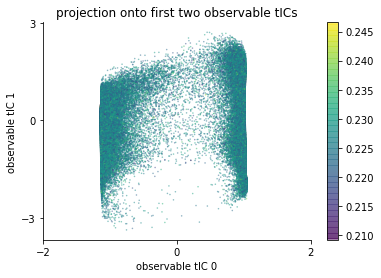

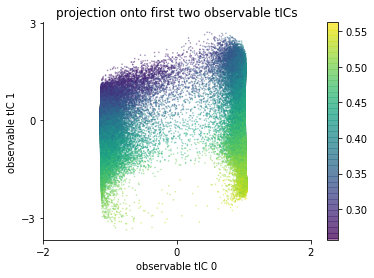

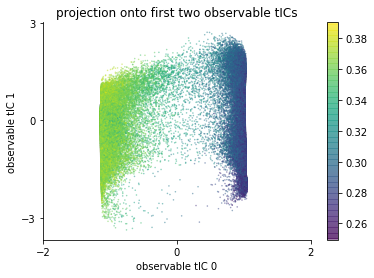

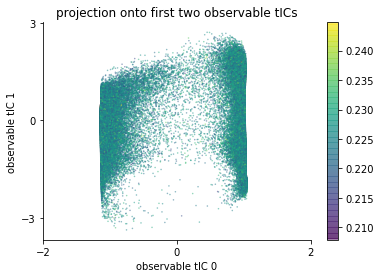

In [16]:
test1 = ObservableTicaObject()
tics = test1.fit_transform(X1, Y1)
print('ics', np.array(tics).shape)
plot_all_obs_cmap(tics[:,0], tics[:,1], Y1)

# Met-Enkephalin: 
### X3 = all torsion angles
### Y3 = Inter residue dist. c-alpha

X dims:  (10, 9992, 38)
Y dims:  (10, 9992, 3)
Fitting data to object pre-whitening
Whitening Data
Estimating Koopman Matrices
largest eigenval:  1.00001
Solving Riccati
(28, 28)
Performing SVD
Done.


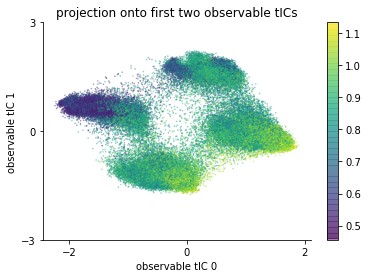

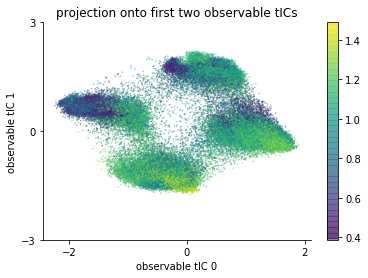

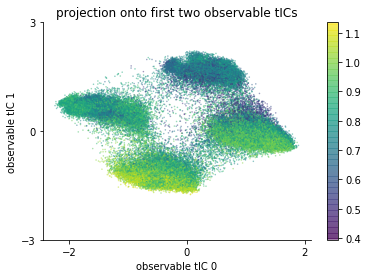

In [17]:
test3 = ObservableTicaObject()
tics = test3.fit_transform(X3, Y3)
plot_all_obs_cmap(tics[:,0], tics[:,1], Y3)

### X4 = all torsion angles
### Y4 = first and last residuce distances (c-alpha)

X dims:  (10, 9992, 38)
Y dims:  (10, 9992, 1)
Fitting data to object pre-whitening
Whitening Data
Estimating Koopman Matrices
largest eigenval:  1.00001
Solving Riccati
(28, 28)
Performing SVD
Done.
boi (99916, 3)


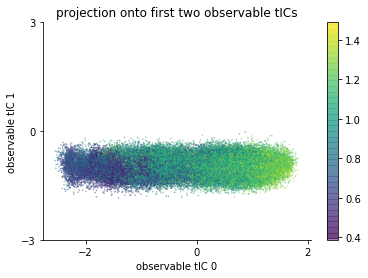

In [18]:
test4 = ObservableTicaObject()
tics = test4.fit_transform(X4, Y4)
print ('boi',np.array(tics).shape)
plot_all_obs_cmap(tics[:,0], tics[:,1], Y4)

# Alanine Dipeptide
### X5 = Interatomic Distances
### Y5_first = first dihedral angle
### Y5_second = second dihedral angle

X dims:  (10, 9999, 231)
Y dims:  (10, 9999, 2)
Fitting data to object pre-whitening
Whitening Data
Estimating Koopman Matrices
largest eigenval:  1.0
Solving Riccati
(22, 22)
Performing SVD
Done.


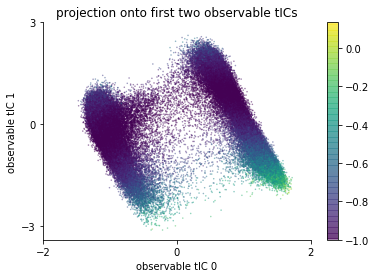

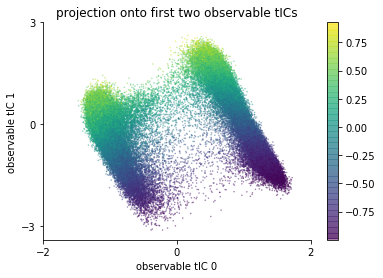

In [19]:
test5 = ObservableTicaObject()
tics = test5.fit_transform(X5, Y5_first)
plot_all_obs_cmap(tics[:,0], tics[:,1], Y5_first)

X dims:  (10, 9999, 231)
Y dims:  (10, 9999, 2)
Fitting data to object pre-whitening
Whitening Data
Estimating Koopman Matrices
largest eigenval:  1.0
Solving Riccati
(22, 22)
Performing SVD
Done.


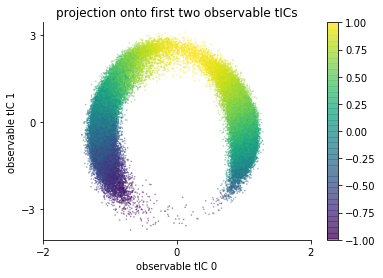

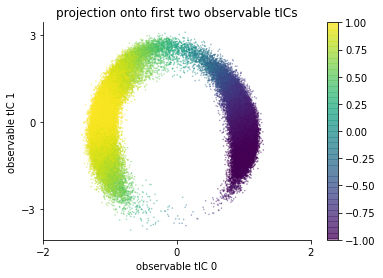

In [20]:
test5 = ObservableTicaObject()
tics = test5.fit_transform(X5, Y5_second)
plot_all_obs_cmap(tics[:,0], tics[:,1], Y5_second)

X dims:  (10, 9999, 231)
Y dims:  (10, 9999, 4)
Fitting data to object pre-whitening
Whitening Data
Estimating Koopman Matrices
largest eigenval:  1.0
Solving Riccati
(22, 22)
Performing SVD
Done.


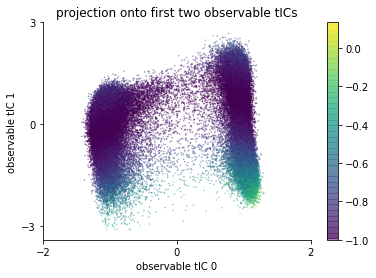

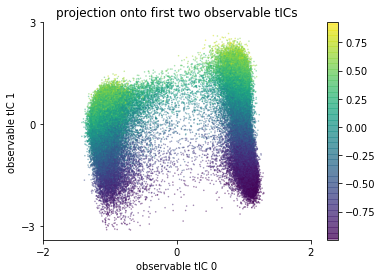

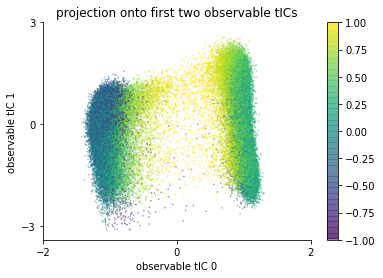

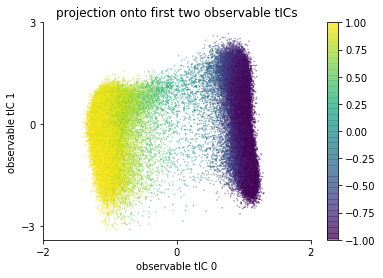

In [21]:
test = ObservableTicaObject()
tics = test.fit_transform(X5, X1)
plot_all_obs_cmap(tics[:,0], tics[:,1], X1)